## MNIST Data

In [59]:
#MNIST data is a combination of a lot of images. These have digits in them from 0 to 9. Every image has 1 digit
# from 0 to 9. Our task is to build a classifier, a neural network which is going to predict which digit
# the given image is going to contain.
#Within tensor flow, there is example.tutorials from which one can load the dataset. There is one small problem with 
#that. It is getting deprecated. Sklearn has a way to load mnist dataset.

In [15]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [17]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc902d5a4a8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc8ea01aa20>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc8ea01abe0>)

In [18]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [20]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [24]:
mnist.train.labels, mnist.test.labels #one-hot encoded, all zeros except one place where value is 1

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [25]:
import numpy as np
import matplotlib.pyplot as plt

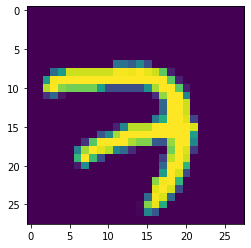

In [26]:
first_image=mnist.train.images[0] #it is a flattened image
#so convert to an np array
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

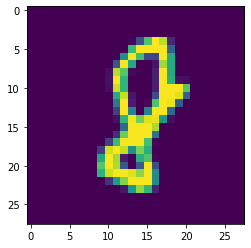

In [28]:
first_image=mnist.train.images[200] #it is a flattened image
#so convert to an np array
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

## Initializing weights and biases

In [29]:
# Each of the image would be 784 sized.Input layer will have 784 entries. Output layer will have 10 units since we 
# have 10 possible values of the output. Suppose we have two hidden layers. For the number of units in the hidden
# layer, we will generally keep it around the same order as the inpu layer (around 100-2000). We can explore.
# Say we keep 256 units in both the hidden layers. There will be biases as well.

In [31]:
tf.random_normal([1,2]) #need to give shape in a square bracket
#Hasn't been executed yet. Run it in a session

<tf.Tensor 'random_normal_1:0' shape=(1, 2) dtype=float32>

In [32]:
#Running in a session
with tf.Session() as sess:
    print(tf.random_normal([1,2]).eval()) #works fine

[[-1.1403996  1.8491718]]


In [33]:
#We need to initialise the weights with some random values so we will use tf.Variable for them
n_input=784 #no of units in input layer
n_hidden1=256
n_hidden2=256
n_classes=10 #output units

#Create weights and biases
#We create a weights dictionary where the first key is hidden 1 and the values are the weights associated with them
#Weights are 2-D
weights={'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
        'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
        'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))} #from a normal distribution values are randomly chosen

#Biases are 1-D
biases={'h1':tf.Variable(tf.random_normal([n_hidden1])),
        'h2':tf.Variable(tf.random_normal([n_hidden2])),
        'out':tf.Variable(tf.random_normal([n_classes]))}

In [34]:
#Forward Propagation
def forward_propagation(x,weights,biases):
    #doing matrix multiplication of weights at h1 layer and input x and adding the bias
    #This gives the net input at layer1
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    
    #layer1 output using relu activation function
    out_layer1=tf.nn.relu(in_layer1)
    
    #input of layer2
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    
    #layer2 output using relu activation function
    out_layer2=tf.nn.relu(in_layer2)
    
    #overall output
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output


In [37]:
#need to pass x as a tensor object
#x would be sometimes training data and sometimes testing data
x=tf.placeholder("float",[None,n_input]) #None as no of images would be different in case of training & testing
#We know how many columns/features each image has (n_input i.e. 784)

y=tf.placeholder(tf.int32,[None,n_classes]) #for each image, my output label would be a 10 sized vector

#Finding predictions and accuracy without optimization
pred=forward_propagation(x,weights,biases)

#Once I have the predictions (size 10000*10), for each prediction we find the maximum value and the index at which
#the maximum value is happening.
predictions=tf.argmax(pred,axis=1) #index at which the maximum is happening. Need to find the argmax among the columns
#For each row, need to find this argmax. Axis=1 refers to columns

correct_labels=tf.argmax(y,1)

sess=tf.Session()
sess.run(tf.global_variables_initializer()) #To initialize the variables
predictions_eval=sess.run(predictions)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float and shape [?,784]
	 [[node Placeholder_2 (defined at /Users/shabeggill/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]

Original stack trace for 'Placeholder_2':
  File "/Users/shabeggill/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/shabeggill/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/Users/shabeggill/anaconda3/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/Users/shabeggill/anaconda3/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/Users/shabeggill/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-db4aa13dedc1>", line 3, in <module>
    x=tf.placeholder("float",[None,n_input]) #None as no of images would be different in case of training & testing
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/Users/shabeggill/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [43]:
correct_predictions=tf.equal(predictions,correct_labels)

In [40]:
#Get an error above since x is a placeholder whose value hasn't been passed yet
predictions_eval=sess.run(predictions,feed_dict={x:mnist.test.images})
predictions_eval

array([2, 9, 9, ..., 8, 8, 8])

In [44]:
#Finding predictions_eval,correct_predictions and correct_labels_eval in case of testing data
predictions_eval,correct_labels_eval,correct_pred_eval=sess.run([predictions,correct_labels,correct_predictions],
                                              feed_dict={x:mnist.test.images, y:mnist.test.labels})
predictions_eval,correct_labels_eval,correct_pred_eval

#Wherever you got a True--> Correct Prediction
#Wherever you got a False--> Incorrect Prediction

(array([2, 9, 9, ..., 8, 8, 8]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([False, False, False, ..., False, False, False]))

In [48]:
correct_pred_eval.sum() #In case of testing data
#Gives the number of times the predictions are correct 

881

In [49]:
#Finding predictions_eval,correct_predictions and correct_labels_eval in case of training data
predictions_eval,correct_labels_eval,correct_pred_eval=sess.run([predictions,correct_labels,correct_predictions],
                                              feed_dict={x:mnist.train.images, y:mnist.train.labels})
predictions_eval,correct_labels_eval,correct_pred_eval

correct_pred_eval.sum() #in case of training data

4702

In [51]:
#Cost Function
#To find the cross entrop cross, use softmax
tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)

<tf.Tensor 'softmax_cross_entropy_with_logits_sg_1/Reshape_2:0' shape=(?,) dtype=float32>

In [87]:
#Running the optimizer
#The inbuilt optimizer will reduce the cost by changing the weights. It will find the gradients and change the
# weights so that the cost reduces over time.

x=tf.placeholder("float",[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)

In [88]:
#We're going to take the mean of the values, since if we have 10000 images, we don't want 10000 sized array
#And for each image there are 1 labels
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

#Now we need to optimize this cosy by changing the weights. We don't need to write the backpropagation code
#by ourselves. We will use an inbuilt optimizer which will take this cost function, figure out what all
# variables this cost is dependant on and change those weights to optimize on the cost

In [89]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [90]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

c=sess.run(cost,feed_dict={x:mnist.train.images,y:mnist.train.labels})
c #Haven't optimized anything here, haven't run the optimizer, just finding the cost

1853.7163

In [91]:
#Run the optimze as well to optimize the cost
c,_=sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels}) #will be 2 variables now since
#we have passed two things here
c #Cost lowers on running the cell multiple times

1853.7163

In [92]:
#How does the optimizer work
# So how does the optimizer know what all variables to change. We had weights, n_input, biases, x, y
#By default all the variables that you create have a property trainable=True
# The optimizer finds out what all variables exist which have trainable=true and it's going to find gradient
# with respect to all of them and change the values for all of them to try and optimize the cost
#If you want, you can even say that you don't ant to train on weights. If you don't want to train on h1,
#just pass trainable=False for it

In [93]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [94]:
#The optimzer finds out what all variables the cost depends upon. If cost doesn't depend upon a variable, it's 
#not going to change that variable just because it's trainable. Now out of all the variables that the cost depends
#upo if any has trainable=False, the optimzer won't chnage that variable

In [95]:
#Running Multiple Iterations

for i in range(25):
    c,_=sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
    print(c)

1236.3419
846.6372
621.8154
502.3223
389.07092
303.49942
261.76602
225.63365
200.18091
185.30444
171.87585
156.47049
140.92676
127.37764
116.44542
108.10843
102.25564
98.249146
94.765915
91.05993
86.92619
82.45847
77.975365
73.93198
70.61224


In [97]:
predictions=tf.argmax(pred,axis=1)
correct_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,correct_labels)
predictions_eval,correct_labels_eval,correct_pred_eval=sess.run([predictions,correct_labels,correct_predictions],
                                              feed_dict={x:mnist.test.images, y:mnist.test.labels})
correct_pred_eval.sum() #Sum of instances where predictions are correct
#Around 85% accuracy now with optimizer

8511

In [98]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [99]:
#Batch Gradient Descent

#Right now we are running the above code 25 times and each time we are taking the complete data as x and y
#we'll change it a bit. We'll run it 25 times but we'll decide a batch size say 100. 55000 %100 = 550
# We will have another loop which will run 550 times (550 batches with each batch having 100 images)

#For every iteration, you won't pass the complete set of images, you will pass small small batches
#Let's say the batch size is 100

batch_size=100
for i in range(25):
    #mnist.train.num_examples will tell the number of examples in training data
    num_batches=int(mnist.train.num_examples/batch_size) #550
    total_cost=0
    for j in range(num_batches): #550 times
        batch_x,batch_y=mnist.train.next_batch(batch_size) #It will give the next 100 images/batch and so on
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y}) #passing batches and not the complete data
        total_cost+=c
    print(total_cost)

24917.090491890907
4717.542796625441
2519.2641644056503
1713.7236086613016
1454.7252786558424
1218.169158488693
1127.8666792290992
976.1358631873157
1041.0333706185477
719.1006587854854
680.0983523169681
612.6682076710088
584.0844628283265
456.3488741140262
428.42722055058437
368.4308195838761
376.7526386510505
368.2062780051944
234.00313719711977
263.88872847072054
261.4197340806405
207.23988392342076
224.0663111453198
204.8215819084576
141.61795510834511


In [100]:
predictions=tf.argmax(pred,axis=1)
correct_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,correct_labels)
predictions_eval,correct_labels_eval,correct_pred_eval=sess.run([predictions,correct_labels,correct_predictions],
                                              feed_dict={x:mnist.test.images, y:mnist.test.labels})
correct_pred_eval.sum() #We get 95.95% accuracy here when we use batch gradient descent

9595